In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Set Up Paths and Load Data

In [2]:
import pandas as pd

base_directory = "/content/drive/MyDrive/archive (8)"
train_directory = base_directory + "/train1"
image_directory = train_directory + "/image_data1"

# Load the CSV files
train_dataframe = pd.read_csv(base_directory + "/train1/train1.csv")
test_dataframe = pd.read_csv(base_directory + "/test.csv")
target = train_dataframe.columns[-1]  # The target column (usually the face count)


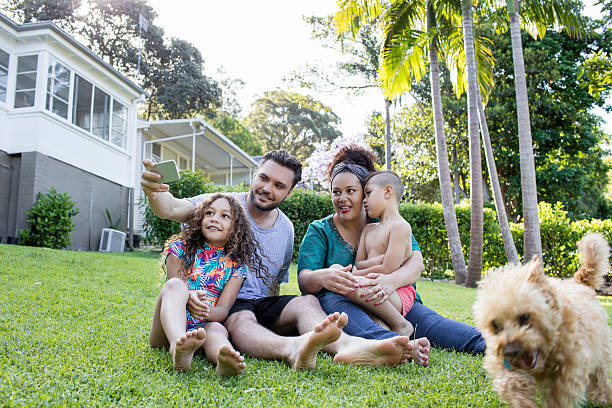

HeadCount:  4


In [3]:
from IPython.display import Image

def display_image(filename, head_count='Test set'):
    display(Image(filename, width=700, height=200))
    print("HeadCount: ", head_count)

# Display a sample image with expected head count
display_image(image_directory + "/" + train_dataframe.iloc[0, 0], train_dataframe.iloc[0, 1])


**Boxes** **on** **Faces**

In [4]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.4 MB/s eta 0:00:00


In [5]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle, Circle

def draw_image_with_boxes(filename, result_list):
    fig, ax = plt.subplots(figsize=(15, 8))
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    plt.show()


 **Initialize Face Detector**

In [6]:
detector = MTCNN()

**Define Function to Detect Faces in an Image**

In [7]:
def detect_faces(filename):
    try:
        current_image = plt.imread(filename)
        boxes = detector.detect_faces(current_image)
        return len(boxes), boxes
    except ValueError:
        print(f"Error loading {filename}")
        return 0, []


**Analyze a Single Image**

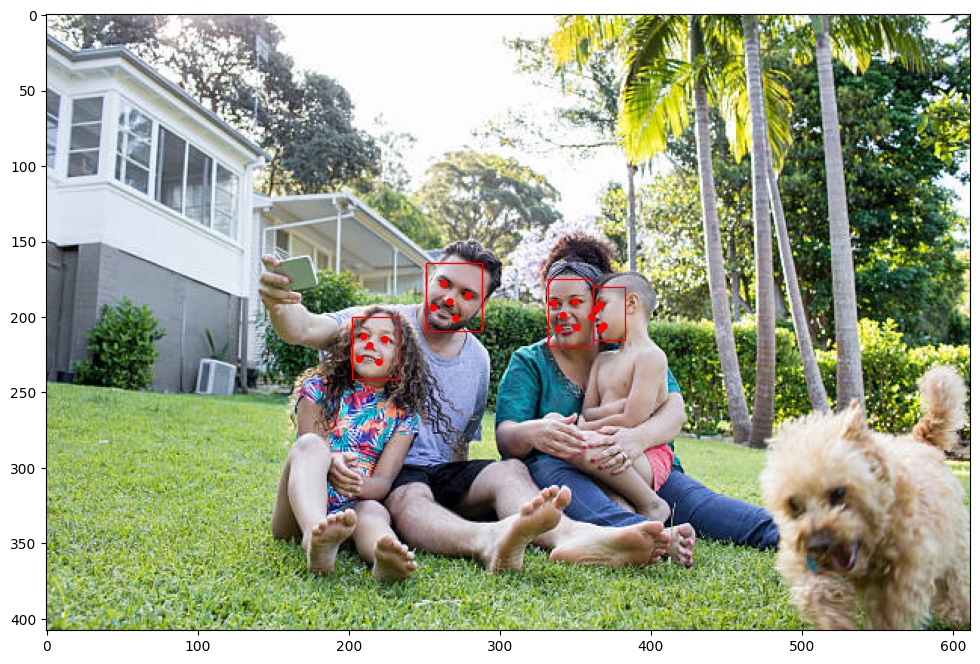

Expected count: 4, Detected count: 4


In [8]:
def single_image_analysis(filename, expected_pred):
    detected_count, detected_boxes = detect_faces(filename)
    draw_image_with_boxes(filename, detected_boxes)
    print(f"Expected count: {expected_pred}, Detected count: {detected_count}")

# Test with a sample image
single_image_analysis(image_directory + "/" + train_dataframe.iloc[0, 0], train_dataframe.iloc[0, 1])


 **Run Face Detection on the Training Set**

In [9]:
# Display column names to identify the correct column for image paths
print(train_dataframe.columns)


Index(['Name', 'HeadCount'], dtype='object')


In [11]:
!pip install tqdm

In [13]:
# Import the tqdm module
from tqdm import tqdm

# Use 'Name' as the column for image filenames and 'HeadCount' as the target
image_files = train_dataframe['Name']
targets = train_dataframe['HeadCount']
predicted_counts = []

# Iterate through image files using tqdm to display a progress bar
for image_file in tqdm(image_files):
    face_count, _ = detect_faces(image_directory + "/" + image_file)
    predicted_counts.append(face_count)

  3%|▎         | 46/1387 [00:41<14:56,  1.50it/s]

Error loading /content/drive/MyDrive/archive (8)/train1/image_data1/10070.jpg


 58%|█████▊    | 804/1387 [10:54<06:52,  1.41it/s]

Error loading /content/drive/MyDrive/archive (8)/train1/image_data1/11175.jpg


 84%|████████▍ | 1168/1387 [15:43<02:26,  1.49it/s]

Error loading /content/drive/MyDrive/archive (8)/train1/image_data1/11681.jpg


 99%|█████████▉| 1379/1387 [18:30<00:05,  1.55it/s]

Error loading /content/drive/MyDrive/archive (8)/train1/image_data1/11990.jpg


100%|██████████| 1387/1387 [18:36<00:00,  1.24it/s]


**Calculate Metrics with Adjusted Accuracy and MAE**

In [22]:
# Adjusted accuracy calculation with a tolerance of ±1
tolerance = 1
correct_predictions = sum([1 for true, pred in zip(targets, predicted_counts) if abs(true - pred) <= tolerance])
adjusted_accuracy = correct_predictions / len(targets)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(targets, predicted_counts)

# R2 Score
r2 = r2_score(targets, predicted_counts)

print(f"Adjusted Accuracy with tolerance ±{tolerance}: {adjusted_accuracy:.2%}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score: {r2:.2f}")


Adjusted Accuracy with tolerance ±1: 88.54%
Mean Absolute Error (MAE): 0.57
R2 Score: 0.66


**Visualization of Predictions vs Actual Counts**

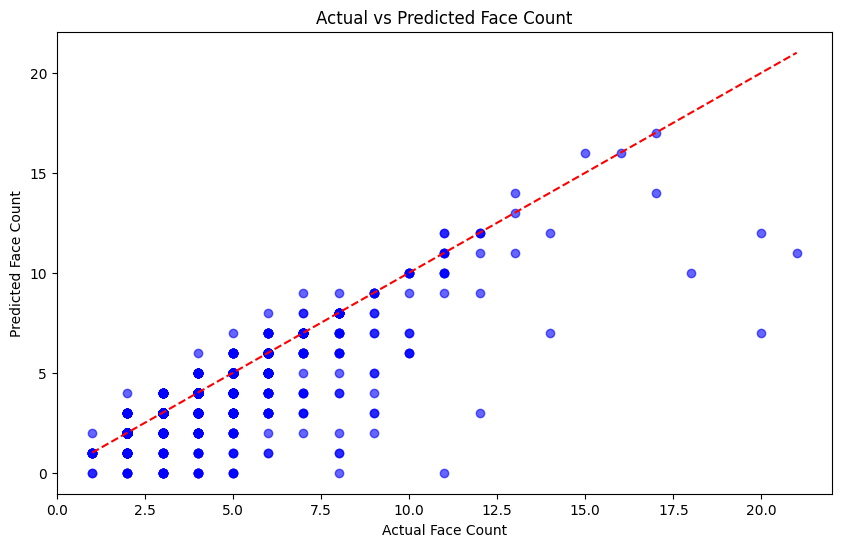

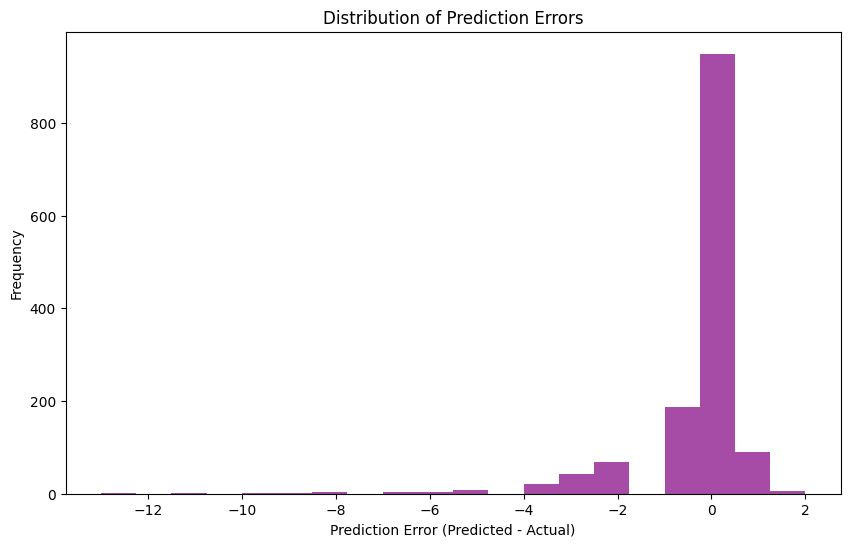

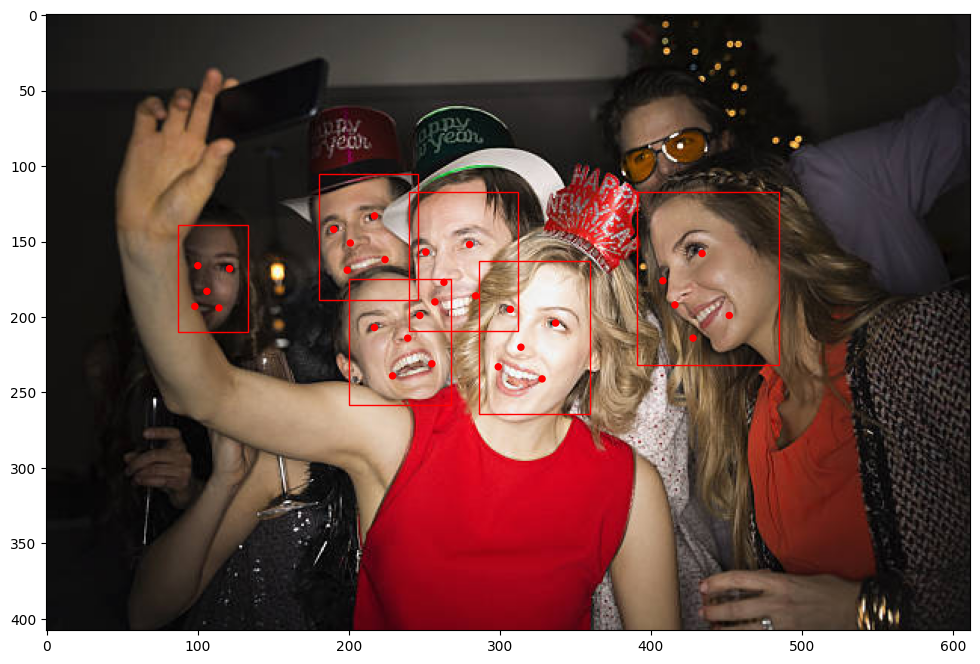

Expected count: 7, Detected count: 6


In [24]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import random
import numpy as np # Import numpy

# Scatter Plot: Actual vs Predicted Counts
plt.figure(figsize=(10, 6))
plt.scatter(targets, predicted_counts, alpha=0.6, color='b')
plt.plot([min(targets), max(targets)], [min(targets), max(targets)], 'r--')  # Reference line
plt.xlabel('Actual Face Count')
plt.ylabel('Predicted Face Count')
plt.title('Actual vs Predicted Face Count')
plt.show()

# Histogram: Distribution of Prediction Errors
errors = np.array(predicted_counts) - np.array(targets) # np is now defined
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='purple', alpha=0.7)
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

# Randomly Display a Sample Image with Bounding Boxes
def display_random_image_with_boxes():
    random_index = random.randint(0, len(image_files) - 1)
    random_image_file = image_files.iloc[random_index]
    expected_count = targets.iloc[random_index]
    detected_count, detected_boxes = detect_faces(image_directory + "/" + random_image_file)
    draw_image_with_boxes(image_directory + "/" + random_image_file, detected_boxes)
    print(f"Expected count: {expected_count}, Detected count: {detected_count}")

# Display a random image with detection results
display_random_image_with_boxes()

**Display a Random Image with Predicted Face Count**

Detected face count for /content/drive/MyDrive/IMG_1230.jpg: 33


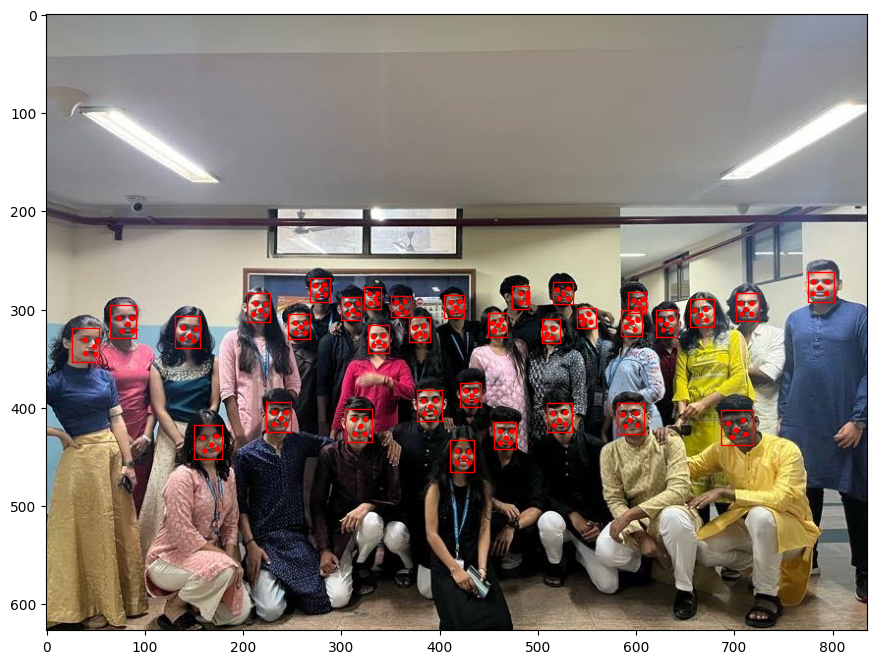

In [30]:
# Define the exact image path you want to analyze
# specific_image_path = "/content/drive/MyDrive/IMG_1230.jpg, /content/WhatsApp Image 2024-11-07 at 21.31.51_498804e3.jpg"  # Update with your actual image path

# Update to process each image path separately
image_paths = ["/content/drive/MyDrive/IMG_1230.jpg"]  # List of image paths

for image_path in image_paths:
    # Run face detection on the current image path
    face_count, detected_boxes = detect_faces(image_path)

    # Display the result for the current image
    print(f"Detected face count for {image_path}: {face_count}")

    # Optionally, draw bounding boxes around detected faces
    draw_image_with_boxes(image_path, detected_boxes)